https://cpptake.com/archives/194

In [2]:
#データのインポート
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train = pd.read_csv('train.csv') #学習データ
test = pd.read_csv('test.csv') #テストデータ
print('The size of the train data:' + str(train.shape))
print('The size of the test data:' + str(test.shape))

The size of the train data:(1460, 81)
The size of the test data:(1459, 80)


In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

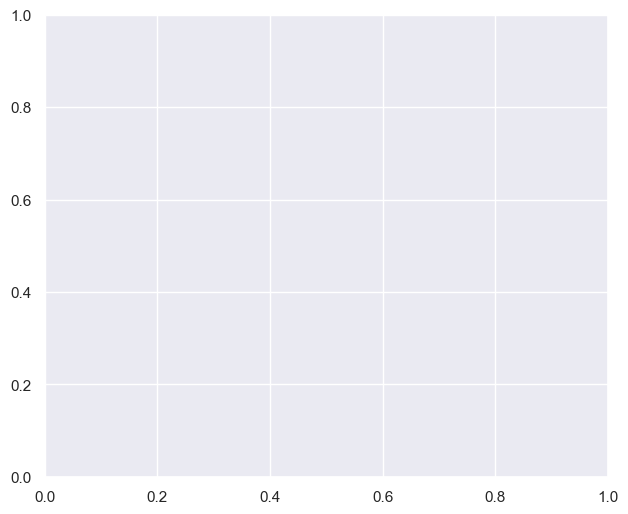

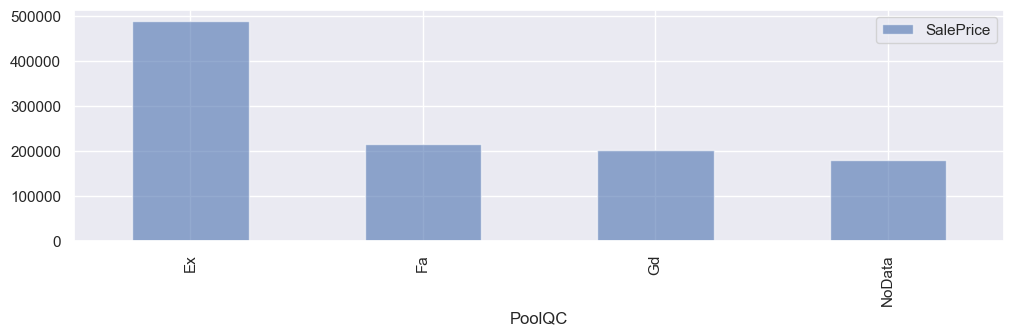

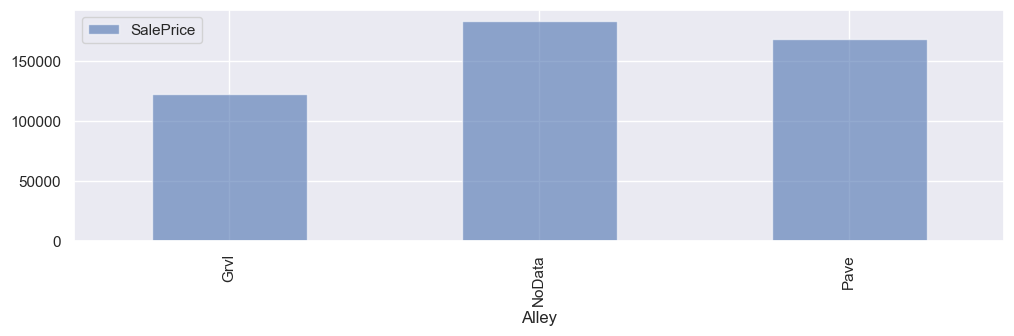

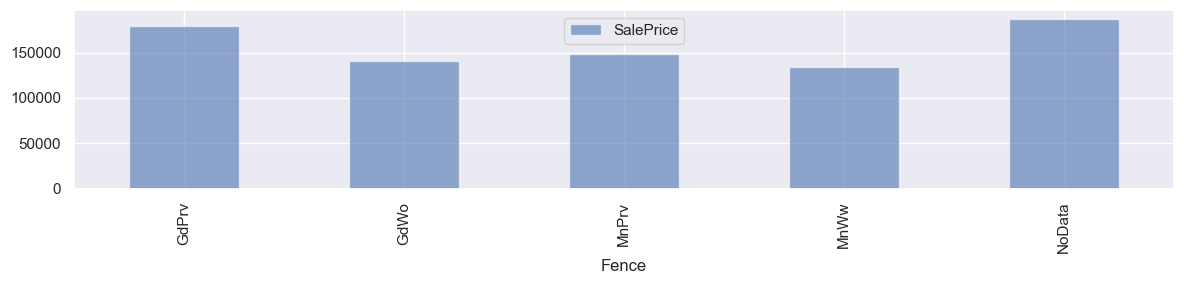

In [6]:
#欠損値が多かったパラメータの欠損値をNoDataに変換
train_cp = train
train_cp['PoolQC'] = train_cp["PoolQC"].fillna('NoData')
train_cp['Alley'] = train_cp["Alley"].fillna('NoData')
train_cp['Fence'] = train_cp["Fence"].fillna('NoData')
#平均値算出
df1 = train_cp.groupby('PoolQC').mean()
df2 = train_cp.groupby('Alley').mean()
df3 = train_cp.groupby('Fence').mean()
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
#グラフ化
df1.plot.bar(y=['SalePrice'], alpha=0.6, figsize=(12,3))
df2.plot.bar(y=['SalePrice'], alpha=0.6, figsize=(12,3))
df3.plot.bar(y=['SalePrice'], alpha=0.6, figsize=(12,3))
plt.tight_layout()
plt.show()

In [7]:
#na_col_listに欠損値を含む説明変数のリストを作成
na_col_list_tra = train.isnull().sum()[train.isnull().sum()>0].index.tolist()
na_col_list_test = test.isnull().sum()[test.isnull().sum()>0].index.tolist()
na_obj_tra = train[na_col_list_tra].dtypes[train[na_col_list_tra].dtypes=='object'].index.tolist() #教師データのobject抽出
na_obj_test = test[na_col_list_test].dtypes[test[na_col_list_test].dtypes=='object'].index.tolist() #テストデータのobject抽出

#教師データの欠損値をNoDataで補間
for i in na_obj_tra:
    train.loc[train[i].isnull(),i] = 'NoData'
#テストデータの欠損値をNoDataで補間
for j in na_obj_test:
    test.loc[test[j].isnull(),j] = 'NoData'

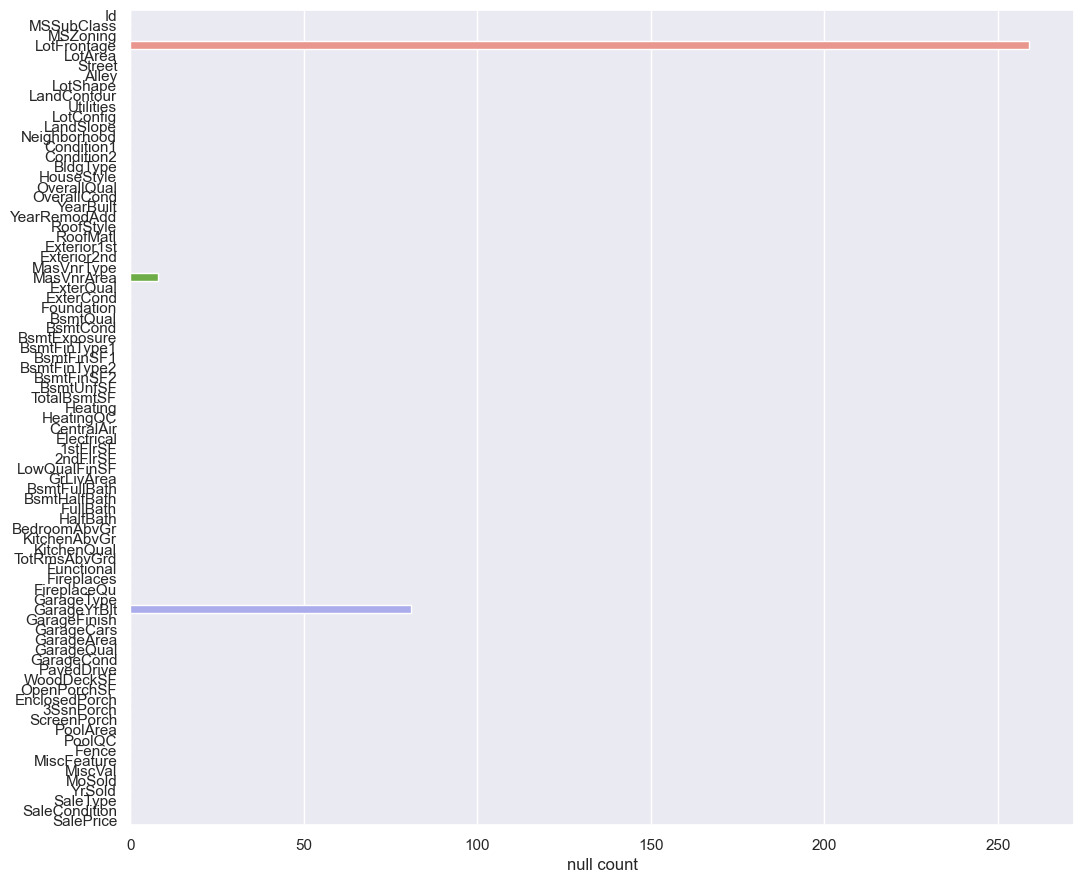

In [8]:
#欠損値の確認
countnull = train.isnull().sum()
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=countnull, y=train.columns.values, orient='h')
#sns.barplot(x=train2.columns.values, y=countnull, orient='h')
ax.set_xlabel("null count")
plt.tight_layout()
plt.show()

In [9]:
#LotFrontageとMasVnrAreaを省く
train = train.drop(['LotFrontage','MasVnrArea'], axis=1)
test = test.drop(['LotFrontage','MasVnrArea'], axis=1)
#残りの欠損値を中央値で補間する
train = train.fillna(train.median())
test = test.fillna(test.median())

C:\Users\arwml\AppData\Local\Temp\ipykernel_21704\339845408.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.median())
C:\Users\arwml\AppData\Local\Temp\ipykernel_21704\339845408.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = test.fillna(test.median())


C:\Users\arwml\AppData\Local\Temp\ipykernel_21704\3607265693.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],bins=15,label='SalePrice')


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

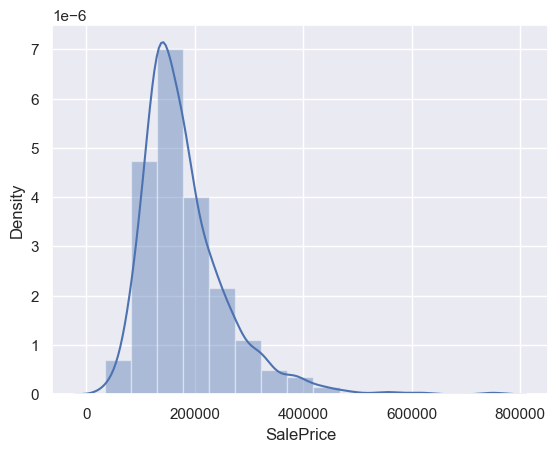

In [10]:
#目的変数の分布を確認
sns.distplot(train['SalePrice'],bins=15,label='SalePrice')

C:\Users\arwml\AppData\Local\Temp\ipykernel_21704\4236728205.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SalesPrice,bins=30,label='SalePrice')


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

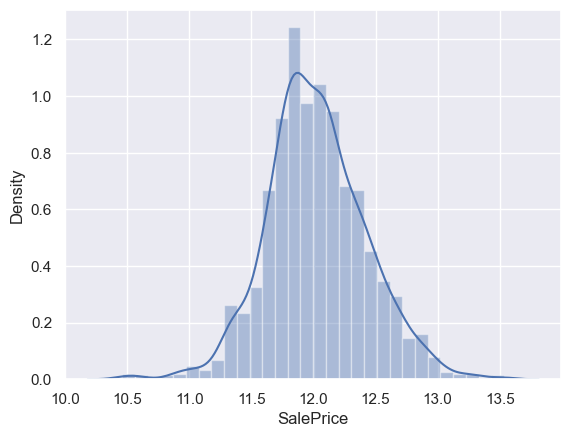

In [11]:
#対数変換
SalesPrice = np.log(train['SalePrice'])
sns.distplot(SalesPrice,bins=30,label='SalePrice')

In [ ]:
train.to_excel('train2a.xlsx')

# ラベルエンコーディングで文字列をint32にする

In [12]:
train2 = train
test2 = test
# ラベルエンコーダーセット
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

#カテゴリカル変数のみを離散化する。
for i in range(train2.shape[1]):
    if train2.iloc[:,i].dtypes == object:
        
        le.fit(list(train2.iloc[:,i].values) + list(test2.iloc[:,i].values))
        train2.iloc[:,i] = le.transform(list(train2.iloc[:,i].values))
        test2.iloc[:,i] = le.transform(list(test2.iloc[:,i].values))

#結果の確認
train2.dtypes

Id               int64
MSSubClass       int64
MSZoning         int32
LotArea          int64
Street           int32
                 ...  
MoSold           int64
YrSold           int64
SaleType         int32
SaleCondition    int32
SalePrice        int64
Length: 79, dtype: object

# one-hotの場合

In [ ]:
# train = pd.get_dummies(train, columns=['Neighborhood'])

In [13]:
#教師データ、テストデータ設定
y_train = train2['SalePrice']
X_train = train2.drop(['Id','SalePrice'], axis=1)
X_test = test2.drop(['Id'], axis=1)

c:\Users\arwml\Py38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


<AxesSubplot:>

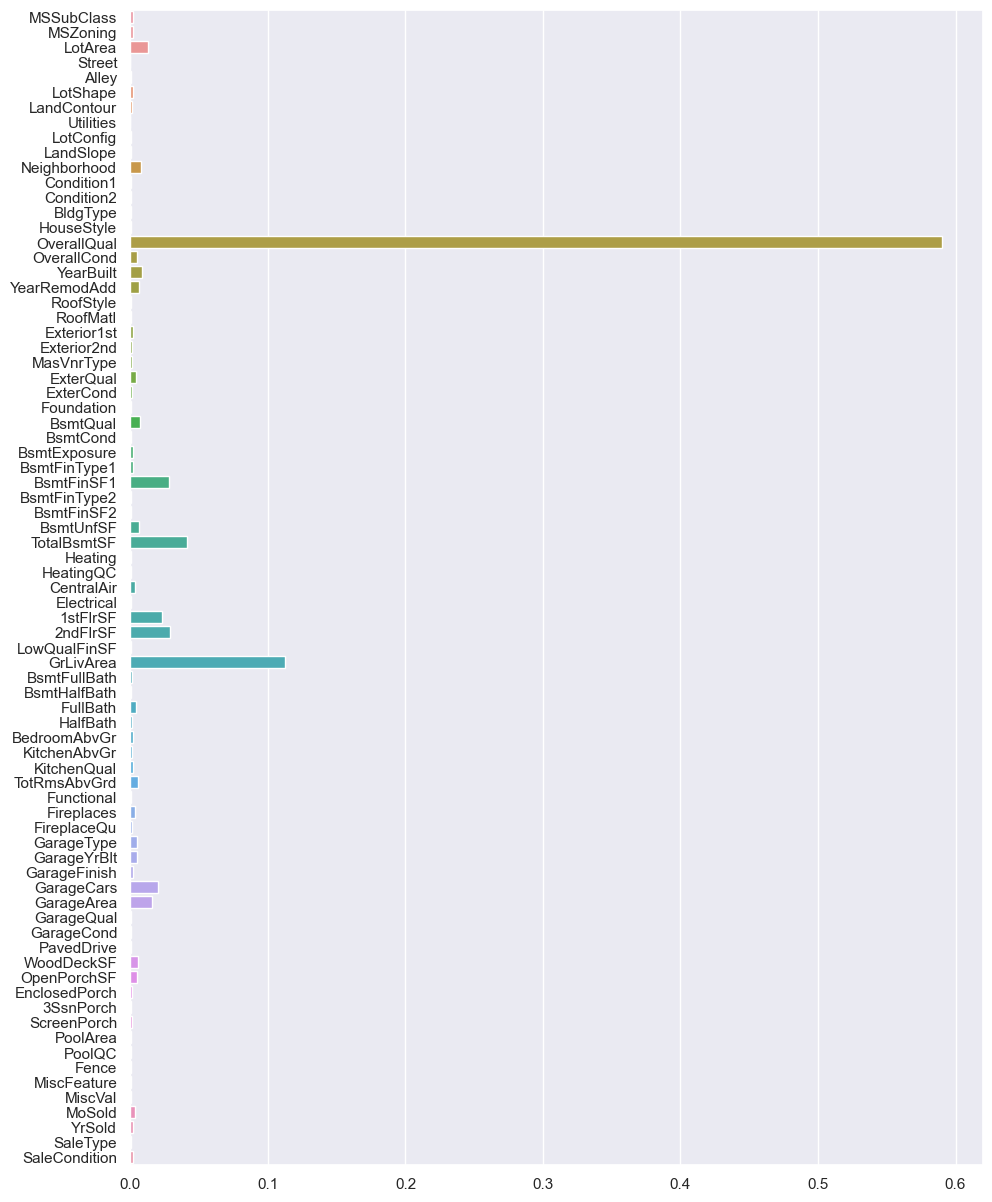

In [14]:

#ランダムフォレスト回帰木セット
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)

# 特徴量ごとの影響度をプロット
f, ax = plt.subplots(figsize=(11, 15))
sns.barplot(x=rf.feature_importances_, y=X_train.columns.values, orient='h')

In [15]:
#影響度の順番に並び替え 
org_sort = np.argsort(-rf.feature_importances_)

#f, ax = plt.subplots(figsize=(11, 19))
#sns.barplot(rf.feature_importances_[org_sort], y=X_train.columns.values[org_sort], orient='h')

#影響度上位２０項目にする
X_train = X_train.iloc[:,org_sort[:20]]
X_test = X_test.iloc[:,org_sort[:20]]

X_train.head()

OverallQual  GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  1stFlrSF  \
0            7       1710          856       854         706       856   
1            6       1262         1262         0         978      1262   
2            7       1786          920       866         486       920   
3            7       1717          756       756         216       961   
4            8       2198         1145      1053         655      1145   

   GarageCars  GarageArea  LotArea  YearBuilt  Neighborhood  BsmtQual  \
0           2         548     8450       2003             5         2   
1           2         460     9600       1976            24         2   
2           2         608    11250       2001             5         2   
3           3         642     9550       1915             6         4   
4           3         836    14260       2000            15         2   

   YearRemodAdd  BsmtUnfSF  TotRmsAbvGrd  WoodDeckSF  OverallCond  GarageType  \
0          2003        150             8           0            5           1   
1          1976        284             6         298            8           1   
2          2002        434             6           0            5           1   
3          1970        540             7           0            5           5   
4          2000        490             9         192            5           1   

   GarageYrBlt  OpenPorchSF  
0       2003.0           61  
1       1976.0            0  
2       2001.0           42  
3       1998.0           35  
4       2000.0           84

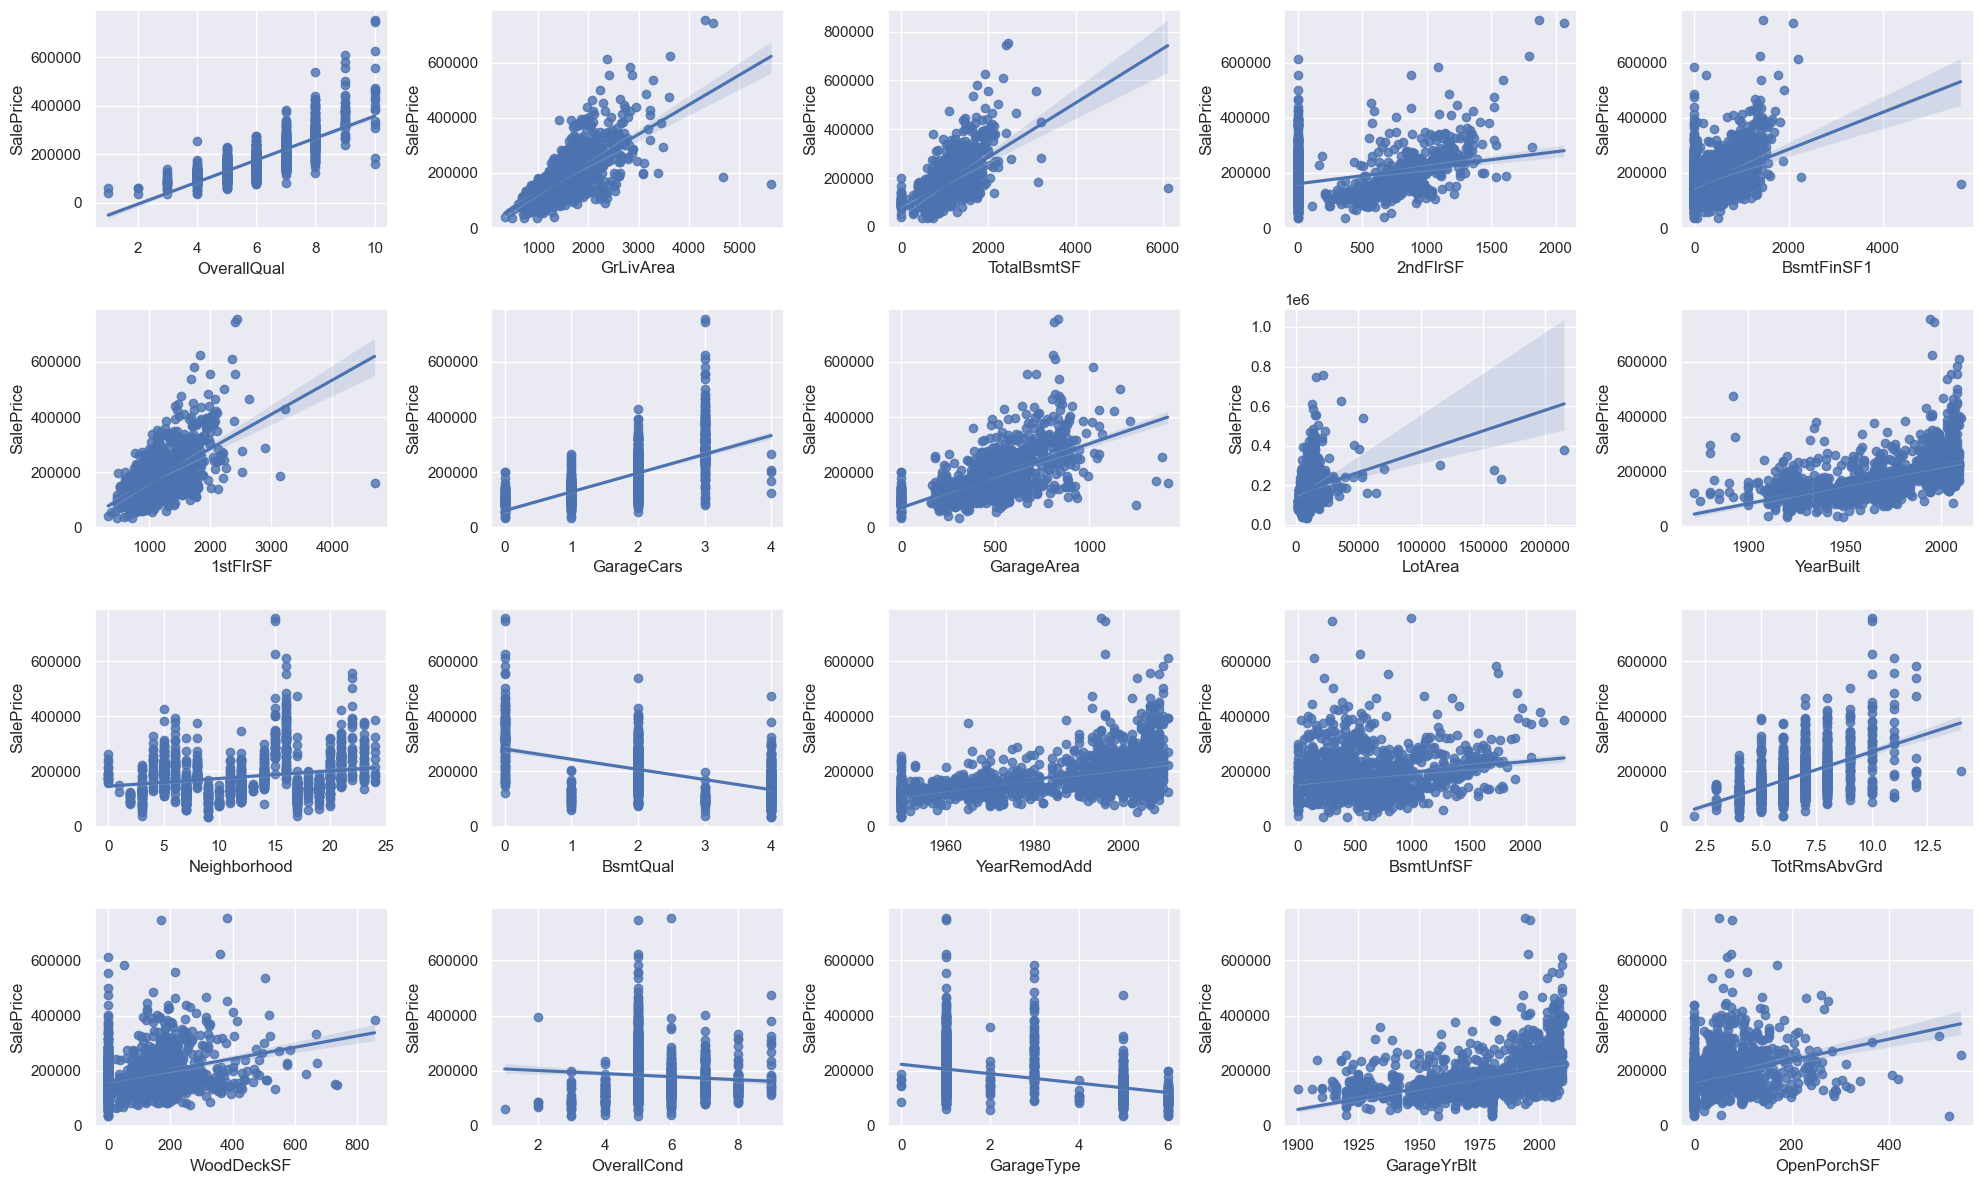

In [16]:
#目的変数と説明変数の2変量の関係を描画
fig = plt.figure(figsize=(20,12))

for i in range(20):
    
    #4×5のグラフを作成。
    ax = fig.add_subplot(4,5,i+1)
    #目的変数（SalePrice)をy軸に、説明変数をx軸にプロット
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

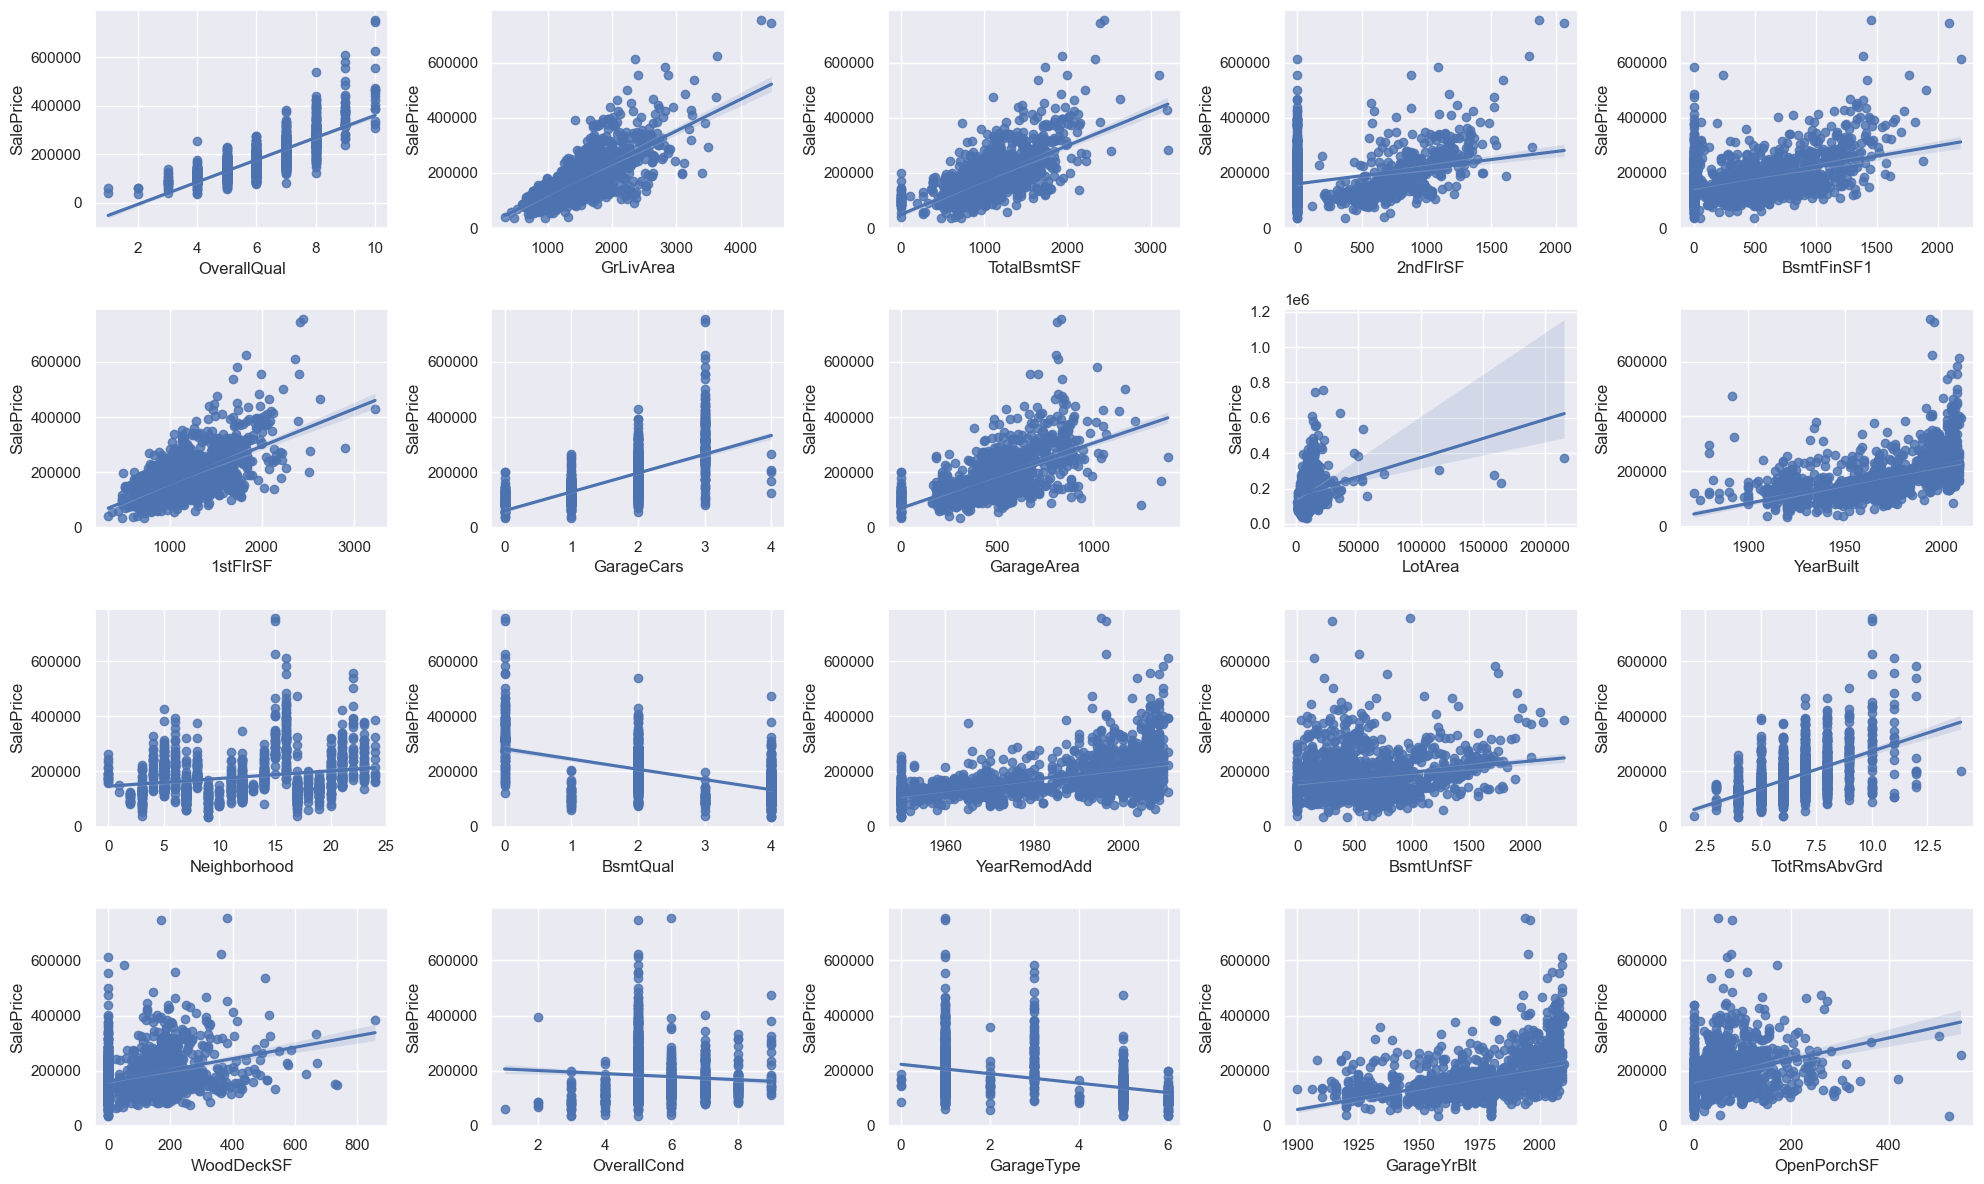

In [17]:
# 'GrLivArea','TotalBsmtSF'の外れ値削除
Xmat = X_train
Xmat['SalePrice'] = y_train
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>4500)].index)
Xmat = Xmat.drop(Xmat[(Xmat['TotalBsmtSF']>4000)].index)


# 結果を教師データに反映
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)


# 外れ値除外できているか確認。
fig = plt.figure(figsize=(20,12))

for i in range(20):
    
    ax = fig.add_subplot(4,5,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [18]:
# z-scoreにて標準化
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [19]:
#利用するモデルをインポート
from sklearn.ensemble import RandomForestRegressor as RFR
import xgboost as XGB
from lightgbm import LGBMRegressor

#ランダムフォレスト
rfr = RFR().fit(X_train,y_train)

#XGBoost
xgb = XGB.XGBRegressor().fit(X_train,y_train)

#lightgbm 
lgb = LGBMRegressor().fit(X_train, y_train)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# #ランダムフォレストのパラメータ調整
# rfr_grid = GridSearchCV(rfr,cv=5,param_grid = {'n_estimators':[25, 100, 500, 1000],
#               'min_samples_split':[0.5,2,4,10],
#               'min_samples_leaf':[1,2,4,10],
#               'max_features':[2,4,8],
#               'bootstrap':[True, False]
#               })

# rfr_grid = rfr_grid.fit(X_train, y_train)
# rfr_grid_best = rfr_grid.best_estimator_

# print("best params = ",rfr_grid.best_params_)


# # XGBoostのパラメータ調整
# from sklearn.model_selection import GridSearchCV
                
# xgb_grid = GridSearchCV(xgb, cv=5, param_grid = {'max_depth': [2,4,6],
#                 'n_estimators': [50,100,200],
#                  'gamma':[0.1, 0.5, 1.0],
#                  'min_child_weight':[1,3,5]
#                  })
# xgb_grid = xgb_grid.fit(X_train, y_train)
# xgb_grid_best = xgb_grid.best_estimator_

# print("best params = ",xgb_grid.best_params_)


# #LightGBMのパラメータ調整
# lgb_best = GridSearchCV(lgb,cv=5,param_grid = {
#     'max_depth':[-1,5,7,9],
#     'bagging_fraction':[0.1,0.5,0.7,0.9],
#     'learning_rate': [0.0001,0.001,0.01,0.1],
#     'bootstrap':[True, False]
#      })

# lgb_best = lgb_best.fit(X_train, y_train)
# rfr_grid_best = lgb_best.best_estimator_

# print("best params = ",lgb_best.best_params_)

In [20]:
#ランダムフォレストのベストのパラメータを入れて学習。
rfr_best = RFR(n_estimators=100,
                max_features = 8,
                min_samples_split = 2,
                min_samples_leaf = 1,
                bootstrap = False,
                random_state = 0)
rfr_best.fit(X_train,y_train)


#XGBoostのベストパラメータを入れて学習
xgb_best = XGB.XGBRegressor(n_estimators=200,
                max_depth = 2,
                min_child_weight = 3,
                gamma = 0.1)
xgb_best.fit(X_train,y_train)


#LightGBMのベストパラメータを入れて学習
lgb_best = LGBMRegressor(bagging_fraction = 0.1,
                        bootstrap = True,
                        learning_rate = 0.1,
                        max_depth = 7)
lgb_best.fit(X_train,y_train)


LGBMRegressor(bagging_fraction=0.1, bootstrap=True, max_depth=7)

学習ファイルの保存方法。  列名のソート必要。  
https://qiita.com/Egh2Deywos/items/5249292a79192e965554

In [21]:
#ランダムフォレスト（パラメータ調整後）予測結果の出力
y_pred_rfr_best = rfr_best.predict(X_test)
Id = np.array(test['Id']).astype(int)
my_rfr_solution = pd.DataFrame(y_pred_rfr_best, Id, columns = ["SalePrice"])

# csvに書き出し
my_rfr_solution.to_csv("my_rfr_best.csv", index_label = ["Id"])


#XGBoost（パラメータ調整後）の予測結果出力
y_pred_xgb_best = xgb_best.predict(X_test)
my_xbg_solution = pd.DataFrame(y_pred_xgb_best, Id, columns = ["SalePrice"])
my_xbg_solution.to_csv("my_xbg_best.csv", index_label = ["Id"])


#LightGBMの（パラメータ調整後）予測結果の出力
y_pred_lgb_best =lgb_best.predict(X_test)
my_lgb_solution = pd.DataFrame(y_pred_lgb_best, Id, columns = ["SalePrice"])
my_lgb_solution.to_csv("my_lbg_best.csv", index_label = ["Id"])

In [22]:
#3つのモデルの予測値を集めたDataFrame作成
emsemble_train = pd.DataFrame( {'RFR': rfr_best.predict(X_train),
    'XGB': xgb_best.predict(X_train),
    'LGB': lgb_best.predict(X_train)
    })

#テストデータの予測値
emsemble_test = pd.DataFrame( {'RFR': rfr_best.predict(X_test),
    'XGB': xgb_best.predict(X_test),
    'LGB': lgb_best.predict(X_test)
    })

In [23]:
#加重平均で3つのモデルの平均値を算出
#LightGBMの予測値の重み付けを強くに、XGBoostを弱くする。
mean = emsemble_test['LGB']*0.5 + emsemble_test['RFR']*0.3 + emsemble_test['XGB']*0.2

#予測値の結果確認
pred_total = pd.DataFrame({'RFR': rfr_best.predict(X_test),
    'XGB': xgb_best.predict(X_test),
    'LGB': lgb_best.predict(X_test),
    'mean': mean
    })
pred_total.head()

RFR            XGB            LGB           mean
0  131323.0  133244.546875  135068.678102  133580.149207
1  158986.0  167271.000000  161564.067809  161932.033123
2  180885.0  182348.562500  181066.825854  181268.627771
3  183533.0  186635.546875  185018.118499  184896.068624
4  192646.0  191434.062500  200640.001728  196400.613364